## Start with 2D case

In [1]:
from collections import namedtuple

Point = namedtuple('Point', ['x', 'y'])

## Generate 3 points on unit circle

In [2]:
import math

class Triangle:
    
    def __init__(self, p1: Point, p2: Point, p3: Point):
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3

    def area(self) -> float:
        return abs((self.p1.x * (self.p2.y - self.p3.y) + self.p2.x * (self.p3.y - self.p1.y) + self.p3.x * (self.p1.y - self.p2.y)) / 2.0)

    def __contains__(self, point: Point) -> bool:
        a1 = Triangle(point, p2, p3).area()
        a2 = Triangle(p1, point, p3).area()
        a3 = Triangle(p1, p2, point).area()
        return math.isclose(self.area(), (a1 + a2 + a3), abs_tol=0.0001)

In [3]:
p1 = Point(0, 0)
p2 = Point(1, 0)
p3 = Point(0, 1)

assert Triangle(p1, p2 , p3).area() == 0.5
assert Point(0.2, 0.2) in Triangle(p1, p2 , p3)
assert Point(0.6, 0.6) not in Triangle(p1, p2 , p3)

p2 = Point(-1, 0)
p3 = Point(0, -1)
assert Triangle(p1, p2 , p3).area() == 0.5

## Generate 3 random points on unit circle

Generate 3 random x between -1 and 1, then pick from 1 of 2 possible Y values

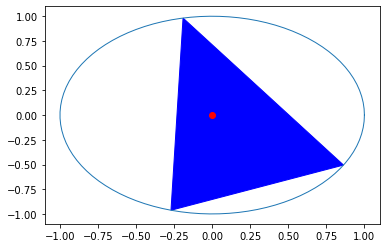

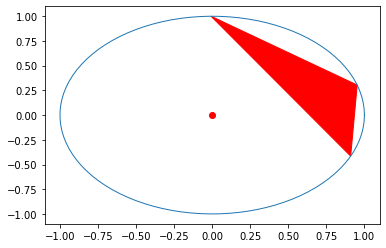

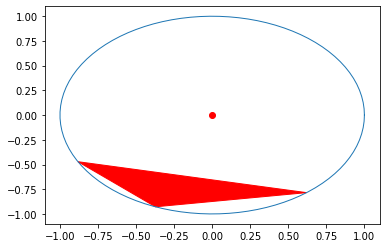

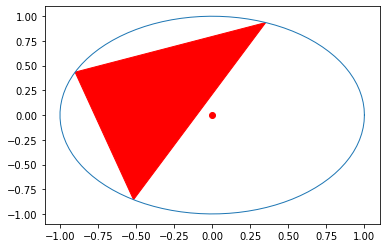

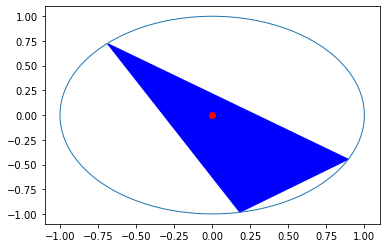

In [4]:
%matplotlib inline

import random
import time

import numpy as np
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

origin = Point(0, 0)

for _ in range(5):
    x1 = random.uniform(-1, 1)
    y1 = math.sqrt(1 - x1**2) * random.choice([-1, 1])
    x2 = random.uniform(-1, 1)
    y2 = math.sqrt(1 - x2**2) * random.choice([-1, 1])
    x3 = random.uniform(-1, 1)
    y3 = math.sqrt(1 - x3**2) * random.choice([-1, 1])

    p1 = Point(x1, y1)
    p2 = Point(x2, y2)
    p3 = Point(x3, y3)

    t = np.linspace(0,np.pi*2,100)
    plt.plot(np.cos(t), np.sin(t), linewidth=1)
    plt.plot(origin.x, origin.y, 'ro')

    color = 'blue' if origin in Triangle(p1, p2, p3) else 'red'

    t1 = plt.Polygon([[p1.x, p1.y], [p2.x, p2.y], [p3.x, p3.y]], color=color)
    plt.gca().add_patch(t1)
    plt.show()
    time.sleep(0.2)

In [5]:
import random
from itertools import repeat

origin = Point(0, 0)

num_runs = 10**5
times_origin_in_triangle = 0

for _ in repeat(None, num_runs):
    x1 = random.uniform(-1, 1)
    y1 = math.sqrt(1 - x1**2) * random.choice([-1, 1])
    x2 = random.uniform(-1, 1)
    y2 = math.sqrt(1 - x2**2) * random.choice([-1, 1])
    x3 = random.uniform(-1, 1)
    y3 = math.sqrt(1 - x3**2) * random.choice([-1, 1])

    p1 = Point(x1, y1)
    p2 = Point(x2, y2)
    p3 = Point(x3, y3)

    t = Triangle(p1, p2, p3)
    times_origin_in_triangle += origin in t

In [6]:
times_origin_in_triangle / num_runs

0.25134

### 3D Case

In [7]:
Point = namedtuple('Point', ['x', 'y', 'z'])

In [8]:
class Tetrahedron:
    
    def __init__(self, p1: Point, p2: Point, p3: Point, p4: Point):
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
        self.p4 = p4

    def volume(self) -> float:
        a = np.array([self.p1.x, self.p1.y, self.p1.z])
        b = np.array([self.p2.x, self.p2.y, self.p2.z])
        c = np.array([self.p3.x, self.p3.y, self.p3.z])
        d = np.array([self.p4.x, self.p4.y, self.p4.z])
        return abs(np.dot(a-d, np.cross(b-d, c-d))) / 6
    
    def __contains__(self, point: Point) -> bool:
        """Using this algorithm
        
        http://steve.hollasch.net/cgindex/geometry/ptintet.html
        """
        d0 = np.array([[self.p1.x, self.p1.y, self.p1.z, 1],
                       [self.p2.x, self.p2.y, self.p2.z, 1],
                       [self.p3.x, self.p3.y, self.p3.z, 1],
                       [self.p4.x, self.p4.y, self.p4.z, 1]])
        
        d1 = np.array([[point.x, point.y, point.z, 1],
                       [self.p2.x, self.p2.y, self.p2.z, 1],
                       [self.p3.x, self.p3.y, self.p3.z, 1],
                       [self.p4.x, self.p4.y, self.p4.z, 1]])
        
        d2 = np.array([[self.p1.x, self.p1.y, self.p1.z, 1],
                       [point.x, point.y, point.z, 1],
                       [self.p3.x, self.p3.y, self.p3.z, 1],
                       [self.p4.x, self.p4.y, self.p4.z, 1]])
        
        d3 = np.array([[self.p1.x, self.p1.y, self.p1.z, 1],
                       [self.p2.x, self.p2.y, self.p2.z, 1],
                       [point.x, point.y, point.z, 1],
                       [self.p4.x, self.p4.y, self.p4.z, 1]])
        
        d4 = np.array([[self.p1.x, self.p1.y, self.p1.z, 1],
                       [self.p2.x, self.p2.y, self.p2.z, 1],
                       [self.p3.x, self.p3.y, self.p3.z, 1],
                       [point.x, point.y, point.z, 1]])
        
        det0 = np.linalg.det(d0)
        det1 = np.linalg.det(d1)
        det2 = np.linalg.det(d2)
        det3 = np.linalg.det(d3)
        det4 = np.linalg.det(d4)
        
        return np.sign(det0) == np.sign(det1) == np.sign(det2) == np.sign(det3) == np.sign(det4)

In [9]:
p1 = Point(0, 0, 0)
p2 = Point(1, 0, 0)
p3 = Point(0, 1, 0)
p4 = Point(0, 0, 1)
t = Tetrahedron(p1, p2, p3, p4)
assert Point(0.01, 0.01, 0.01) in t
assert Point(0.5, 0.5, 0.5) not in t

In [10]:
origin = Point(0.01, 0.01, 0.01)

points = []
for _ in range(4):
    # generate random point on unit sphere
    vec = np.random.randn(3, 1)
    vec /= np.linalg.norm(vec, axis=0)
    points.append(Point(vec[0][0], vec[1][0], vec[2][0]))

t = Tetrahedron(points[0], points[1], points[2], points[3])

In [11]:
num_runs = 10**5
num_times_origin_contained = 0

for _ in repeat(None, num_runs):
    points = []
    for _ in range(4):
        # generate random point on unit sphere
        vec = np.random.randn(3, 1)
        vec /= np.linalg.norm(vec, axis=0)
        points.append(Point(vec[0][0], vec[1][0], vec[2][0]))

    t = Tetrahedron(points[0], points[1], points[2], points[3])
    num_times_origin_contained += origin in t

In [12]:
num_times_origin_contained / num_runs

0.12439